In [42]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers,models, Sequential
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

In [3]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [4]:
base_model.trainable=False

In [5]:
base_model.layers

[<InputLayer name=input_layer, built=True>,
 <Conv2D name=block1_conv1, built=True>,
 <Conv2D name=block1_conv2, built=True>,
 <MaxPooling2D name=block1_pool, built=True>,
 <Conv2D name=block2_conv1, built=True>,
 <Conv2D name=block2_conv2, built=True>,
 <MaxPooling2D name=block2_pool, built=True>,
 <Conv2D name=block3_conv1, built=True>,
 <Conv2D name=block3_conv2, built=True>,
 <Conv2D name=block3_conv3, built=True>,
 <MaxPooling2D name=block3_pool, built=True>,
 <Conv2D name=block4_conv1, built=True>,
 <Conv2D name=block4_conv2, built=True>,
 <Conv2D name=block4_conv3, built=True>,
 <MaxPooling2D name=block4_pool, built=True>,
 <Conv2D name=block5_conv1, built=True>,
 <Conv2D name=block5_conv2, built=True>,
 <Conv2D name=block5_conv3, built=True>,
 <MaxPooling2D name=block5_pool, built=True>]

In [6]:
for i, layer in enumerate(base_model.layers):
    print(i, layer.name, layer.trainable, layer.get_weights)

0 input_layer False <bound method Layer.get_weights of <InputLayer name=input_layer, built=True>>
1 block1_conv1 False <bound method Layer.get_weights of <Conv2D name=block1_conv1, built=True>>
2 block1_conv2 False <bound method Layer.get_weights of <Conv2D name=block1_conv2, built=True>>
3 block1_pool False <bound method Layer.get_weights of <MaxPooling2D name=block1_pool, built=True>>
4 block2_conv1 False <bound method Layer.get_weights of <Conv2D name=block2_conv1, built=True>>
5 block2_conv2 False <bound method Layer.get_weights of <Conv2D name=block2_conv2, built=True>>
6 block2_pool False <bound method Layer.get_weights of <MaxPooling2D name=block2_pool, built=True>>
7 block3_conv1 False <bound method Layer.get_weights of <Conv2D name=block3_conv1, built=True>>
8 block3_conv2 False <bound method Layer.get_weights of <Conv2D name=block3_conv2, built=True>>
9 block3_conv3 False <bound method Layer.get_weights of <Conv2D name=block3_conv3, built=True>>
10 block3_pool False <bound me

In [7]:
layer = base_model.get_layer('block1_conv1')

In [8]:
weights = layer.get_weights()

In [9]:
layer

<Conv2D name=block1_conv1, built=True>

In [10]:
#weights of first filter
weights[0][:,:,:,0]

array([[[ 0.42947057,  0.55037946,  0.4800154 ],
        [ 0.373467  ,  0.44007453,  0.4085474 ],
        [-0.06136011, -0.08138704, -0.06514555]],

       [[ 0.27476987,  0.34573907,  0.31047726],
        [ 0.03868078,  0.04063221,  0.05020237],
        [-0.36722335, -0.4535013 , -0.40338343]],

       [[-0.05746817, -0.05863491, -0.05087169],
        [-0.26224968, -0.33066967, -0.2852275 ],
        [-0.35009676, -0.4850302 , -0.41851634]]], dtype=float32)

In [35]:
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,137,729 (80.63 MB)

 Trainable params: 6,423,041 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [37]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [18]:
X_train = np.loadtxt('Datasets/input.csv', delimiter=',')

In [19]:
X_test = np.loadtxt('Datasets/input_test.csv', delimiter=',')

In [20]:
y_train = np.loadtxt('Datasets/labels.csv', delimiter=',')

In [21]:
y_test = np.loadtxt('Datasets/labels_test.csv', delimiter=',')

In [22]:
X_train.shape

(2000, 30000)

In [23]:
X_test.shape

(400, 30000)

In [24]:
y_train.shape

(2000,)

In [25]:
y_test.shape

(400,)

In [26]:
X_train = X_train.reshape(len(X_train), 100,100,3)
X_test = X_test.reshape(len(X_test), 100,100,3)

In [27]:
X_train = tf.image.resize(X_train, [224,224])
X_test = tf.image.resize(X_test, [224,224])

In [28]:
X_train.shape

TensorShape([2000, 224, 224, 3])

In [29]:
X_test.shape

TensorShape([400, 224, 224, 3])

In [30]:
y_train.shape

(2000,)

In [31]:
y_test.shape

(400,)

In [32]:
# Preprocess for VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

In [33]:
X_train.shape

TensorShape([2000, 224, 224, 3])

In [39]:
result = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2)

Epoch 1/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 208s 3s/step - accuracy: 0.9708 - loss: 0.5939 - val_accuracy: 0.9625 - val_loss: 0.7181
Epoch 2/2
63/63 ━━━━━━━━━━━━━━━━━━━━ 215s 3s/step - accuracy: 0.9869 - loss: 0.2894 - val_accuracy: 0.9675 - val_loss: 0.8704


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-112.7654..151.061].


1.0


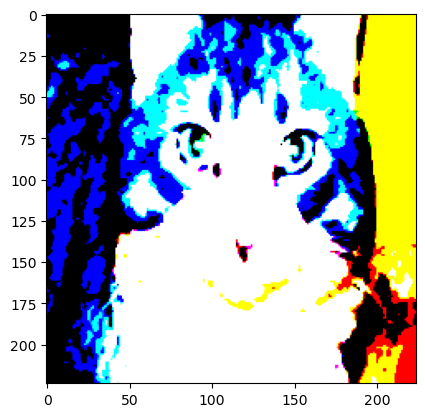

In [52]:
idx = random.randint(0, len(X_train)-1)
plt.imshow(X_train[idx,:])
print(y_train[idx])

In [54]:
X1 = np.loadtxt('Datasets/input.csv', delimiter=',')

In [56]:
X2 = np.loadtxt('Datasets/input_test.csv', delimiter=',')

In [58]:
X = np.vstack((X1,X2))

In [59]:
X.shape

(2400, 30000)

In [60]:
X = X.reshape(len(X), 100,100,3)

In [61]:
X.shape

(2400, 100, 100, 3)

In [67]:
X_resized = tf.image.resize(X, [224,224])
X_resized.shape

TensorShape([2400, 224, 224, 3])

In [68]:
X_ready = preprocess_input(X_resized)

In [74]:
X_ready.shape

TensorShape([2400, 224, 224, 3])

In [95]:
X_ready = X_ready.numpy()

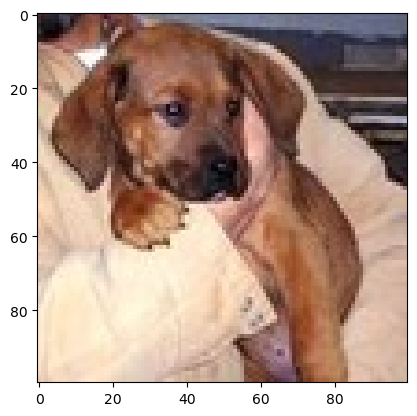

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
DOG


In [97]:
predict_idx = random.randint(0,len(X)-1)
plt.imshow(X[predict_idx,:].astype('uint8'))
plt.show()
# y_pred = model.predict(tf.expand_dims(X_ready[predict_idx],axis=0))
y_pred = model.predict(X_ready[predict_idx].reshape(1,224,224,3))
y_pred = y_pred >0.5
if(y_pred[0][0]==False):
    print("DOG")
else:
    print("CAT")